In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20


In [2]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('강남구전세데이터_찐마지막.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_Code         87361 non-null  int64  
 1   Admin_District  87361 non-null  object 
 2   Area            87361 non-null  float64
 3   YearBuilt       87361 non-null  int64  
 4   Type            87361 non-null  object 
 5   Floor           87361 non-null  float64
 6   Address         87361 non-null  object 
 7   Cont_Date       87361 non-null  object 
 8   Age             87361 non-null  int64  
 9   Latitude        87361 non-null  float64
 10  Longitude       87361 non-null  float64
 11  Star_Cnt        87361 non-null  int64  
 12  Michelin_Cnt    87361 non-null  int64  
 13  Mc_cnt          87361 non-null  int64  
 14  Bigstore_cnt    87361 non-null  int64  
 15  InterestRate    87361 non-null  float64
 16  Market_cnt      87361 non-null  int64  
 17  Subway_cnt      87361 non-null 

In [5]:
print(df.describe())
print(df.describe(include='object'))

            AD_Code          Area     YearBuilt         Floor           Age  \
count  87361.000000  87361.000000  87361.000000  87361.000000  87361.000000   
mean       5.422694     67.776567   2000.491901      6.859915     22.508099   
std        4.148519     37.183271     12.485836      5.758265     12.485836   
min        0.000000     11.390000   1972.000000     -1.000000      0.000000   
25%        2.000000     40.560000   1992.000000      3.000000     10.000000   
50%        4.000000     59.920000   2002.000000      5.000000     21.000000   
75%        9.000000     84.930000   2013.000000     10.000000     31.000000   
max       13.000000    301.470000   2023.000000     67.000000     51.000000   

           Latitude     Longitude      Star_Cnt  Michelin_Cnt        Mc_cnt  \
count  87361.000000  87361.000000  87361.000000  87361.000000  87361.000000   
mean      37.498124    127.057102      2.651034      1.253111      0.343162   
std        0.015544      0.022320      2.424018    

In [6]:
# (선택) 결측치 확인
print(df.isnull().sum())

# 결측치 처리 (예시: 평균값으로 대체)
df.fillna(df.mean(), inplace=True)

AD_Code           0
Admin_District    0
Area              0
YearBuilt         0
Type              0
Floor             0
Address           0
Cont_Date         0
Age               0
Latitude          0
Longitude         0
Star_Cnt          0
Michelin_Cnt      0
Mc_cnt            0
Bigstore_cnt      0
InterestRate      0
Market_cnt        0
Subway_cnt        0
Kinder_cnt        0
y                 0
dtype: int64


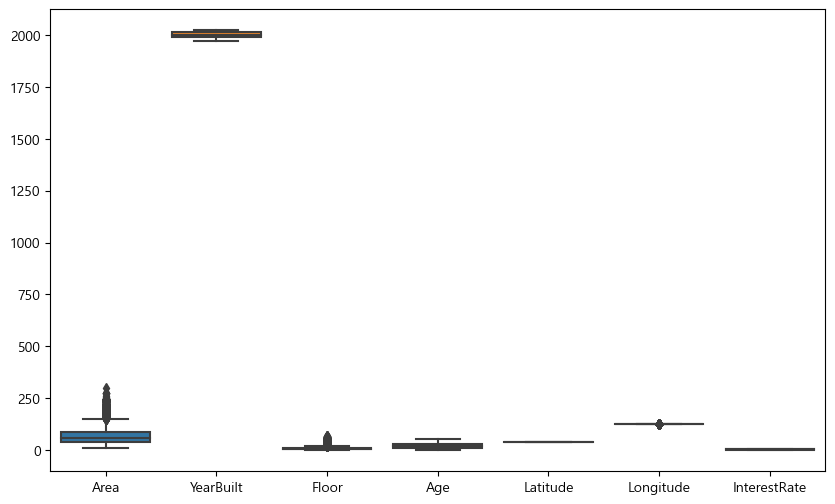

In [7]:
# (선택) 이상치 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Area', 'YearBuilt', 'Floor', 'Age', 'Latitude', 'Longitude', 'InterestRate']])
plt.show()

# (선택) 이상치 제거 (예시: IQR을 이용한 제거)
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Area'] >= Q1 - 1.5 * IQR) & (df['Area'] <= Q3 + 1.5 * IQR)]

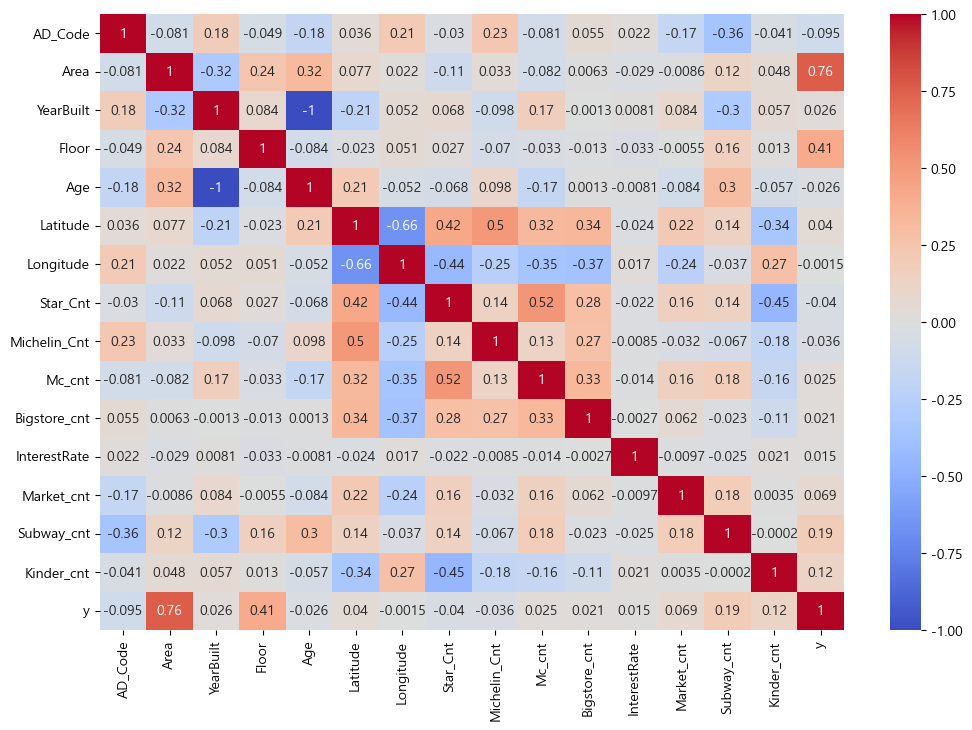

In [8]:
# 상관 행렬
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 다양한 시각화 분석 (히스토그램, 산점도, 카테고리별 막대 그래프 등)

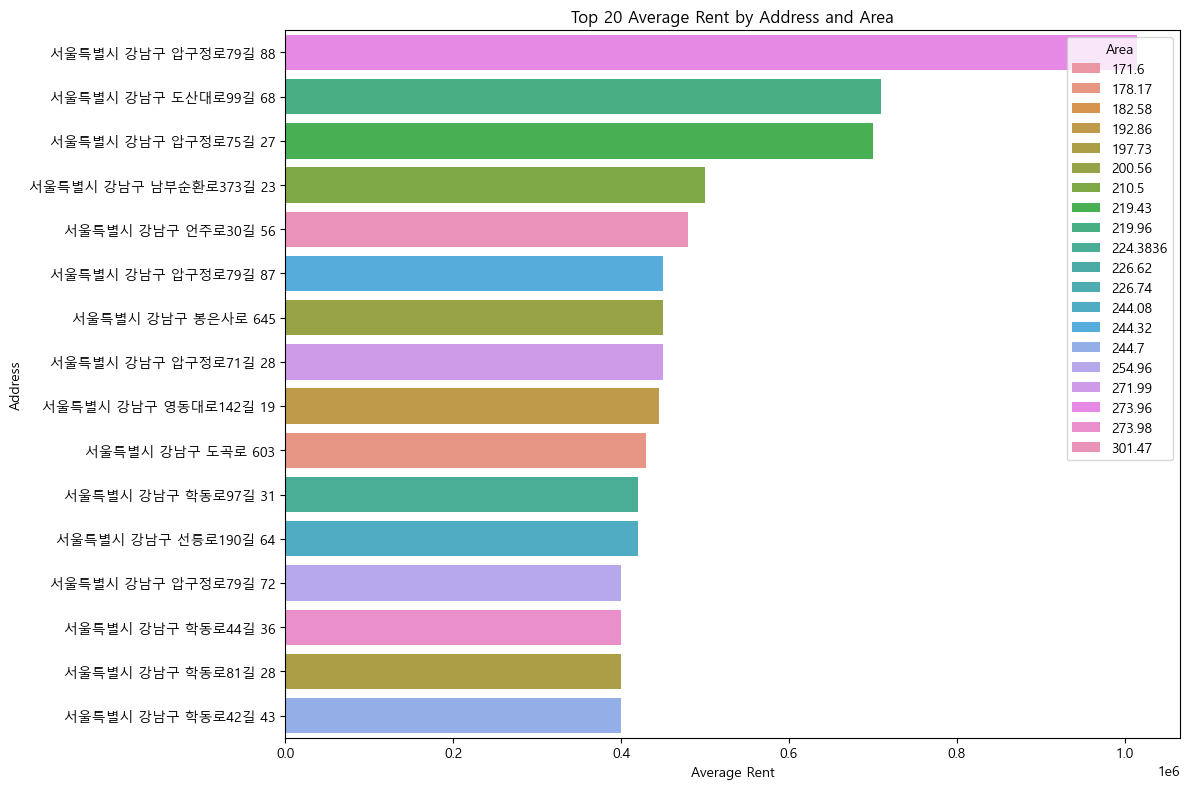

In [9]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('강남구전세데이터_찐마지막.csv')

# 주소와 지역별 평균 임대료 계산
grouped_data = df.groupby(['Address', 'Area'])['y'].mean().sort_values(ascending=False).reset_index()

# 상위 20개 데이터 선택
top_20 = grouped_data.head(20)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='y', y='Address', data=top_20, hue='Area', dodge=False)
plt.title('Top 20 Average Rent by Address and Area')
plt.xlabel('Average Rent')
plt.ylabel('Address')
plt.legend(title='Area')
plt.tight_layout()
plt.show()

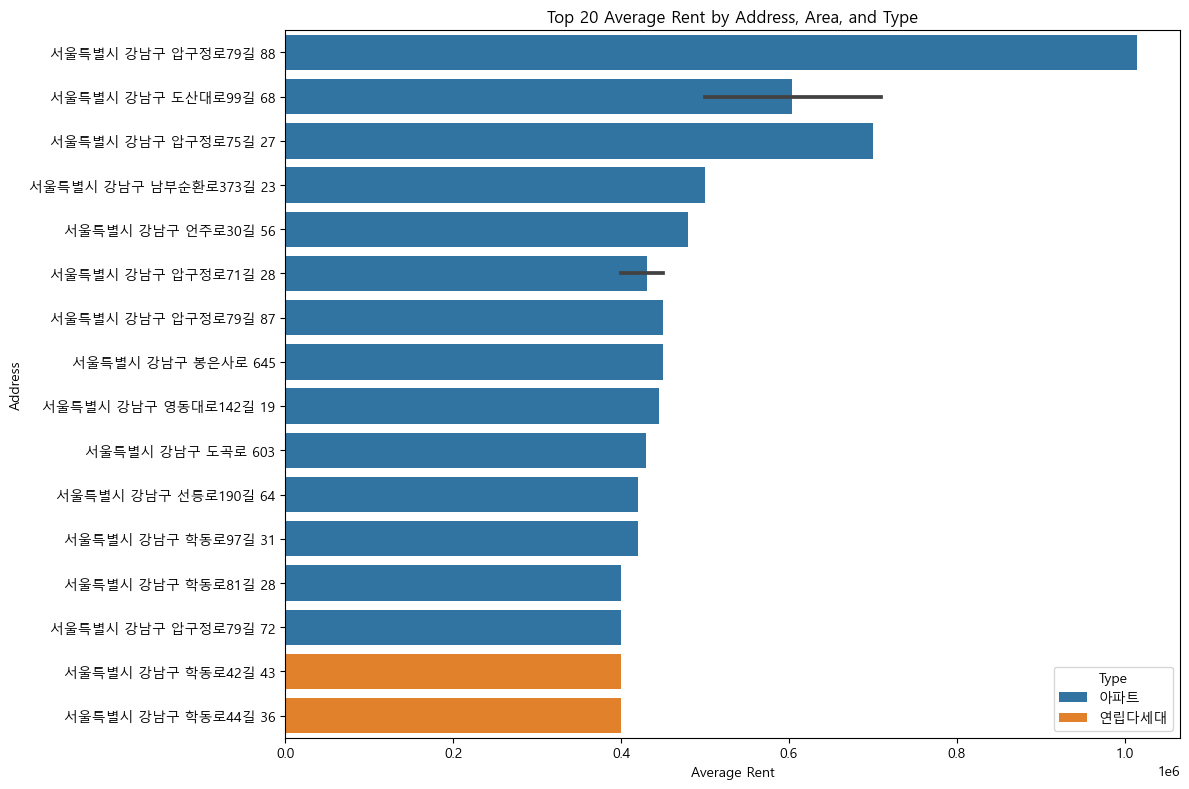

In [10]:
# 주소, 지역, 유형별 평균 임대료 계산
grouped_data_type = df.groupby(['Address', 'Area', 'Type'])['y'].mean().sort_values(ascending=False).reset_index()

# 상위 20개 데이터 선택
top_20_type = grouped_data_type.head(20)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='y', y='Address', data=top_20_type, hue='Type', dodge=False)
plt.title('Top 20 Average Rent by Address, Area, and Type')
plt.xlabel('Average Rent')
plt.ylabel('Address')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 타겟 변수를 가격으로 해보자

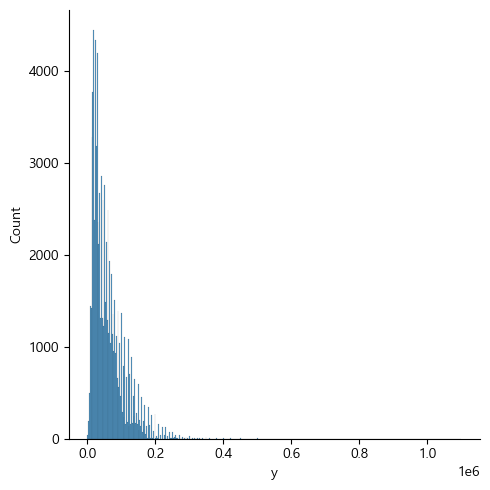

In [11]:
sns.displot(df, x="y")

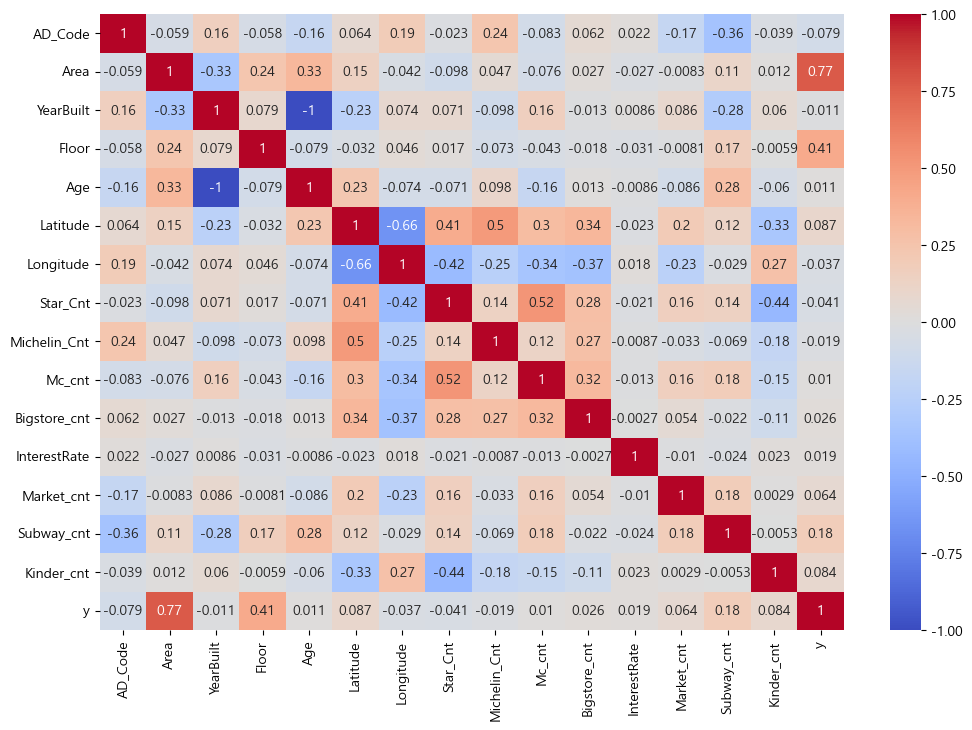

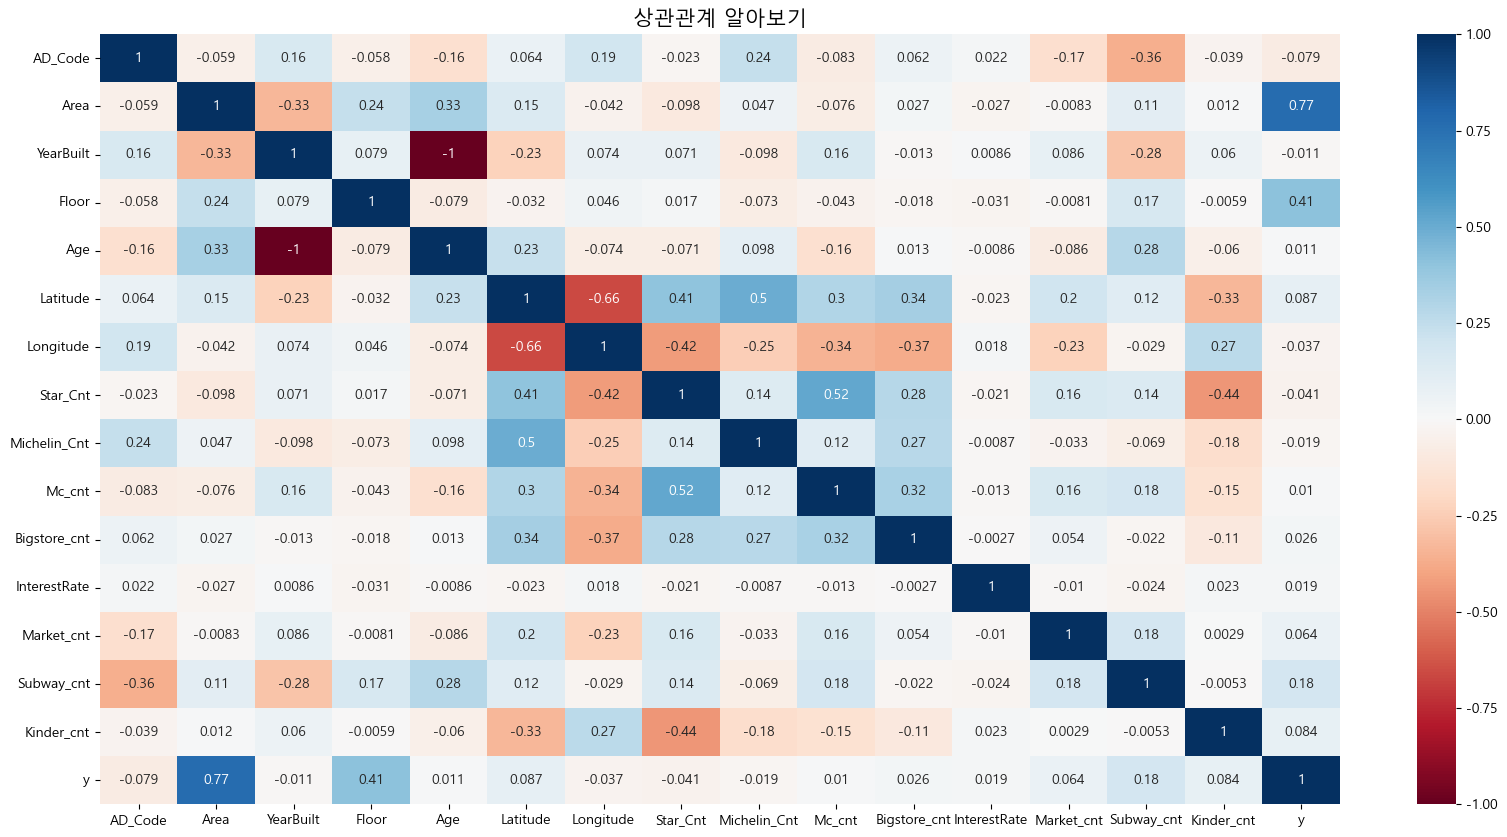

In [12]:
# 상관 행렬
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("상관관계 알아보기", size=15)
plt.show()


# Address / Area / Type 관계를 생각해보자

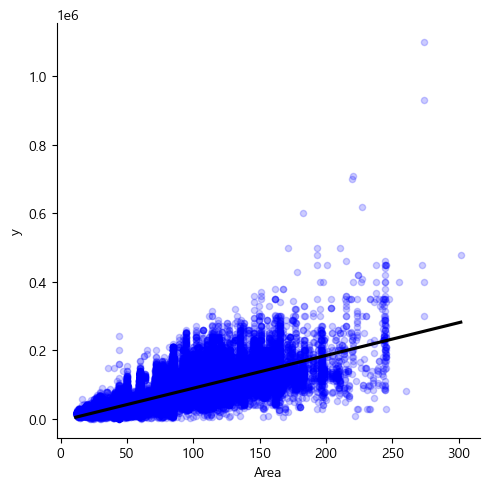

In [13]:
sns.lmplot(x="Area", y="y", data=df, scatter_kws={"s": 20, 'color':'blue', 'alpha':0.2},
          line_kws={'color':'black'});


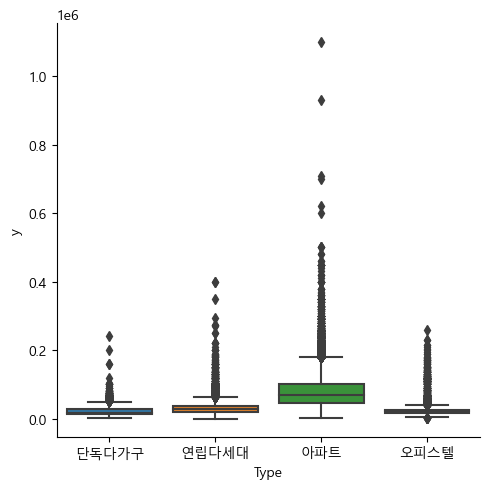

In [14]:
sns.catplot(data=df, x="Type", y="y", kind="box")

In [15]:
df['Area'].describe()

count    87361.000000
mean        67.776567
std         37.183271
min         11.390000
25%         40.560000
50%         59.920000
75%         84.930000
max        301.470000
Name: Area, dtype: float64

In [16]:
df['Area'].nunique()

5813

In [17]:
bins = [0, 30, 60, 90, 120, float('inf')]
labels = ['0-30', '30-60', '60-90', '90-120', '120+']
df['Area_band'] = pd.cut(df['Area'], bins=bins, labels=labels, include_lowest=True)
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,...,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y,Area_band
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,...,0,0,0,0,4.04,0,0,2,7500,30-60
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,...,0,0,0,0,4.82,0,0,2,14333,30-60
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,...,0,0,0,0,4.16,0,0,2,17115,30-60
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,...,0,0,0,0,4.16,0,0,2,17640,30-60
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,...,0,0,0,0,4.04,0,0,2,7500,30-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,...,3,1,1,1,2.64,0,0,1,45000,60-90
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,...,3,17,0,2,2.74,0,0,1,38000,30-60
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,...,3,31,1,2,2.64,0,0,0,23500,30-60
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,...,1,0,0,0,2.44,0,0,1,3000,0-30


In [18]:
df['Adress_Area_band'] = df['Address'] + df['Area_band'].astype(str)

In [19]:
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,...,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,Kinder_cnt,y,Area_band,Adress_Area_band
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,...,0,0,0,4.04,0,0,2,7500,30-60,서울특별시 강남구 논현로4길30-60
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,...,0,0,0,4.82,0,0,2,14333,30-60,서울특별시 강남구 논현로4길30-60
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,...,0,0,0,4.16,0,0,2,17115,30-60,서울특별시 강남구 논현로4길30-60
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,...,0,0,0,4.16,0,0,2,17640,30-60,서울특별시 강남구 논현로4길30-60
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,...,0,0,0,4.04,0,0,2,7500,30-60,서울특별시 강남구 논현로4길30-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,...,1,1,1,2.64,0,0,1,45000,60-90,서울특별시 강남구 역삼로 43260-90
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,...,17,0,2,2.74,0,0,1,38000,30-60,서울특별시 강남구 압구정로 46130-60
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,...,31,1,2,2.64,0,0,0,23500,30-60,서울특별시 강남구 도산대로 40630-60
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,...,0,0,0,2.44,0,0,1,3000,0-30,서울특별시 강남구 논현로20길 120-30


In [20]:
# 'Address' 컬럼에서 원하는 부분 추출하여 새로운 컬럼 생성
df['Extracted_Address'] = df['Address'].str.extract(r'(서울특별시 강남구 [^\d]+)')

# 중복 제거
df.drop_duplicates(subset='Extracted_Address', keep='first', inplace=True)

# 결과 출력
print(df)

       AD_Code Admin_District      Area  YearBuilt   Type  Floor  \
0            0            개포동   44.0000       1989  단독다가구    3.0   
46           0            개포동   44.0000       2000  단독다가구    3.0   
407          0            개포동   44.0000       1989  단독다가구    3.0   
547          0            개포동   44.0000       1982  단독다가구    3.0   
552          1            논현동   44.0000       1989  단독다가구    3.0   
681          1            논현동   44.0000       1992  단독다가구    3.0   
1085         1            논현동   44.0000       1991  단독다가구    3.0   
1197         1            논현동   44.0000       1993  단독다가구    3.0   
2291         2            대치동   44.0000       2009  단독다가구    3.0   
2352         2            대치동   44.0000       1989  단독다가구    3.0   
2770         2            대치동   44.0000       1996  단독다가구    3.0   
3070         2            대치동   44.0000       2000  단독다가구    3.0   
3421         3            도곡동   44.0000       1983  단독다가구    3.0   
3974         4            삼성동   44.0000       19

In [21]:
import folium
import pandas as pd
import requests

# 주소 데이터 생성
data = {
    'Address': [
        '서울특별시 강남구 논현로4길',
        '서울특별시 강남구 논현로4길',
        '서울특별시 강남구 언주로 432-10',
        '서울특별시 강남구 압구정로 461'
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 'Address' 컬럼에서 원하는 부분 추출하여 새로운 컬럼 생성
df['Extracted_Address'] = df['Address'].str.extract(r'(서울특별시 강남구 [^\d]+)')

# 중복 제거
df.drop_duplicates(subset='Extracted_Address', keep='first', inplace=True)

# Google Maps Geocoding API 사용을 위한 API 키
api_key = 'YOUR_GOOGLE_MAPS_API_KEY'

# 지도 초기화
m = folium.Map(location=[37.5, 127], zoom_start=13)

# 데이터 포인트 추가
for index, row in df.iterrows():
    address = row['Extracted_Address']
    url = f'https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={api_key}'
    response = requests.get(url).json()
    if response['results']:
        location = response['results'][0]['geometry']['location']
        folium.Marker(
            location=[location['lat'], location['lng']],
            popup=address
        ).add_to(m)

# 지도 출력
m